In [ ]:
!pip install kneed

In [ ]:
import pandas as pd

try:
    AddressDimension_df = pd.read_csv('/content/sample_data/AddressDimension.csv', encoding='latin-1')
    FactSales_df = pd.read_csv('/content/sample_data/FactSales.csv', encoding='latin-1')
    CustomerDemographicDimension_df = pd.read_csv('/content/sample_data/CustomerDemographicDimension.csv', encoding='latin-1')
    CustomerTerritoryDimension_df = pd.read_csv('/content/sample_data/CustomerTerritoryDimension.csv', encoding='latin-1')
    ProductDimension_df = pd.read_csv('/content/sample_data/ProductDimension.csv', encoding='latin-1', on_bad_lines='skip')
    Sales_HeaderDetailDimension_df = pd.read_csv('/content/sample_data/Sales_HeaderDetailDimension.csv', encoding='latin-1')
    CustomerIncome_df = pd.read_csv('/content/sample_data/CustomerIncome.csv', encoding='latin-1')
    CustomerReturnRate_df = pd.read_csv('/content/sample_data/CustomerReturnRate.csv', encoding='latin-1')
    TerritoryGrowth_df = pd.read_csv('/content/sample_data/TerritoryGrowth.csv', encoding='latin-1')
    print("CSV files loaded successfully.")
except Exception as e:
    print(f"Error loading CSV files: {str(e)}")

CSV files loaded successfully.


In [ ]:
import pandas as pd

try:
    Sales_HeaderDetailDimension_df['OrderDate'] = pd.to_datetime(Sales_HeaderDetailDimension_df['OrderDate'], errors='coerce')

    Sales_HeaderDetailDimension_df.dropna(subset=['OrderDate'], inplace=True)
    print("OrderDate column reformatted successfully.")

except Exception as e:
    print(f"Error reformatting OrderDate column: {str(e)}")

OrderDate column reformatted successfully.


In [ ]:
try:
    CustomerDemographicDimension_df['DateFirstPurchase'] = pd.to_datetime(CustomerDemographicDimension_df['DateFirstPurchase'], errors='coerce')
    CustomerDemographicDimension_df['BirthDate'] = pd.to_datetime(CustomerDemographicDimension_df['BirthDate'], errors='coerce')
    CustomerDemographicDimension_df.dropna(subset=['DateFirstPurchase', 'BirthDate'], inplace=True)

    CustomerDemographicDimension_df.loc[CustomerDemographicDimension_df['TotalPurchaseYTD'] < 0, 'TotalPurchaseYTD'] = \
        -CustomerDemographicDimension_df['TotalPurchaseYTD']

    print("CustomerDemographicDimension columns reformatted and negative values handled successfully.")

except Exception as e:
    print(f"Error reformatting CustomerDemographicDimension columns: {str(e)}")

CustomerDemographicDimension columns reformatted and negative values handled successfully.


In [ ]:
try:
    Sales_HeaderDetailDimension_df.loc[Sales_HeaderDetailDimension_df['UnitPrice'] < 0, 'UnitPrice'] = \
        -Sales_HeaderDetailDimension_df['UnitPrice']
    Sales_HeaderDetailDimension_df.loc[Sales_HeaderDetailDimension_df['OrderQty'] < 0, 'OrderQty'] = \
        -Sales_HeaderDetailDimension_df['OrderQty']
    Sales_HeaderDetailDimension_df.loc[Sales_HeaderDetailDimension_df['LineTotal'] < 0, 'LineTotal'] = \
        -Sales_HeaderDetailDimension_df['LineTotal']
    Sales_HeaderDetailDimension_df.loc[Sales_HeaderDetailDimension_df['SubTotal'] < 0, 'SubTotal'] = \
        -Sales_HeaderDetailDimension_df['SubTotal']
    print("Negative values in UnitPrice, OrderQty, LineTotal and SubTotal columns handled successfully.")
except Exception as e:
    print(f"Error handling negative values: {str(e)}")

Negative values in UnitPrice, OrderQty, LineTotal and SubTotal columns handled successfully.


In [ ]:
AddressDimension_df.describe()

AddressID   TerritoryID  StateProvinceID  AddressDimID
count  19614.000000  19614.000000     19614.000000  19614.000000
mean   19516.281228      5.765423        49.284644   9807.500000
std     6961.696423      3.088373        46.108624   5662.218426
min        1.000000      1.000000         1.000000      1.000000
25%    15190.250000      4.000000         9.000000   4904.250000
50%    20093.500000      6.000000        50.000000   9807.500000
75%    24996.750000      9.000000        77.000000  14710.750000
max    32521.000000     10.000000       181.000000  19614.000000

In [ ]:
FactSales_df.describe()

FactID   AddressDimID      ProductID  CustomerTerritoryDimID  \
count  114336.000000  114336.000000  114336.000000           114336.000000   
mean    57168.500000    9750.708648     851.876189            10900.414777   
std     33006.104526    5807.149824      84.999072             5666.689299   
min         1.000000       1.000000     707.000000                9.000000   
25%     28584.750000    4656.000000     782.000000             6462.000000   
50%     57168.500000    9630.000000     872.000000            11275.000000   
75%     85752.250000   14618.000000     922.000000            16094.000000   
max    114336.000000   19614.000000     999.000000            19816.000000   

       CustomerDemoDimID  HeaderDetailDimID      TypeDimID       SubTotal  \
count      114336.000000      114336.000000  114336.000000  114336.000000   
mean        26868.717254       57962.237336    5364.771411     969.233714   
std          4990.892909       33561.235441    2499.057715    1062.940432   
min         18197.000000           7.000000       4.000000       2.290000   
25%         22532.750000       27905.750000    3198.000000      56.970000   
50%         26831.000000       56598.500000    5351.500000     567.760000   
75%         31241.250000       85212.250000    7550.000000    2294.990000   
max         35538.000000      118744.000000   15469.000000    3578.270000   

              TaxAmt        Freight  OrderQty      UnitPrice  \
count  114336.000000  114336.000000  114336.0  114336.000000   
mean       77.538698      24.230867       1.0     480.440250   
std        85.035235      26.573512       0.0     925.860114   
min         0.183200       0.057300       1.0       2.290000   
25%         4.557600       1.424300       1.0       7.950000   
50%        45.420800      14.194000       1.0      29.990000   
75%       183.599200      57.374800       1.0     159.000000   
max       286.261600      89.456800       1.0    3578.270000   

       UnitPriceDiscount      LineTotal  
count           114336.0  114336.000000  
mean                 0.0     480.440250  
std                  0.0     925.860114  
min                  0.0       2.290000  
25%                  0.0       7.950000  
50%                  0.0      29.990000  
75%                  0.0     159.000000  
max                  0.0    3578.270000

In [ ]:
CustomerDemographicDimension_df.describe()

TotalPurchaseYTD              DateFirstPurchase  \
count      37016.000000                          37016   
mean         816.939232  2003-08-19 08:30:33.066781952   
min            0.000000            2001-07-01 00:00:00   
25%           24.070000            2003-04-15 00:00:00   
50%          114.990000            2003-11-05 00:00:00   
75%         1329.191250            2004-03-13 00:00:00   
max         9650.760000            2004-07-31 00:00:00   
std         1121.329433                            NaN   

                           BirthDate  NumberCarsOwned  TotalChildren  \
count                          37016     37016.000000   37016.000000   
mean   1962-01-26 18:40:55.500324192         1.502648       1.844446   
min              1910-08-13 00:00:00         0.000000       0.000000   
25%              1954-09-07 12:00:00         1.000000       0.000000   
50%              1963-08-13 00:00:00         2.000000       2.000000   
75%              1970-09-26 00:00:00         2.000000       3.000000   
max              1980-12-26 00:00:00         4.000000       5.000000   
std                              NaN         1.138020       1.612613   

       NumberChildrenAtHome  BusinessEntityID  CustomerDemoDimID  
count          37016.000000      37016.000000       37016.000000  
mean               1.004106      11533.684137       18508.500000  
min                0.000000       1699.000000           1.000000  
25%                0.000000       6912.750000        9254.750000  
50%                0.000000      11535.500000       18508.500000  
75%                2.000000      16160.250000       27762.250000  
max                5.000000      20777.000000       37016.000000  
std                1.522450       5342.184767       10685.743119

In [ ]:
CustomerTerritoryDimension_df.describe()

TerritoryID      PersonID      StoreID      SalesYTD  SalesLastYear  \
count  19820.000000  19119.000000  1336.000000  1.982000e+04   1.982000e+04   
mean       5.824975  11184.190230  1037.654940  6.977892e+06   3.384333e+06   
std        3.042676   5578.705977   475.914755  2.340943e+06   1.564087e+06   
min        1.000000    291.000000   292.000000  2.402177e+06   1.307950e+06   
25%        4.000000   6438.500000   648.000000  5.012905e+06   2.278549e+06   
50%        6.000000  11218.000000   993.000000  6.771829e+06   3.298694e+06   
75%        9.000000  15997.500000  1342.000000  7.887187e+06   5.366576e+06   
max       10.000000  20777.000000  2051.000000  1.051085e+07   5.693989e+06   

         CustomerID  CustomerTerritoryDimID  
count  19820.000000            19820.000000  
mean   19844.277094             9910.500000  
std     6581.785914             5721.685503  
min        1.000000                1.000000  
25%    15253.750000             4955.750000  
50%    20208.500000             9910.500000  
75%    25163.250000            14865.250000  
max    30118.000000            19820.000000

In [ ]:
ProductDimension_df.describe()

ProductID   ListPrice  StandardCost  ProductModelID
count  290.000000  290.000000    290.000000       81.000000
mean   548.920690   31.277931     15.199840       84.395062
std    221.386189   69.078835     34.317516       27.315599
min      1.000000    0.000000      0.000000        2.000000
25%    394.250000    0.000000      0.000000       61.000000
50%    466.500000    0.000000      0.000000       87.000000
75%    808.750000   24.997500     10.311475      107.000000
max    996.000000  404.990000    179.815600      128.000000

In [ ]:
CustomerIncome_df

TerritoryID  TotalCustomers_0_25000  TotalCustomers_25001_50000  \
0            1                     575                        1187   
1            2                      13                          20   
2            3                      13                          17   
3            4                     670                        1492   
4            5                      12                          33   
5            6                     275                         539   
6            7                     246                         572   
7            8                     314                         583   
8            9                     564                        1213   
9           10                     288                         568   

   TotalCustomers_50001_75000  TotalCustomers_75001_100000  \
0                        1118                          600   
1                          24                           10   
2                          31                           17   
3                        1394                          650   
4                          36                           18   
5                         470                          250   
6                         566                          311   
7                         534                          244   
8                        1099                          436   
9                         614                          312   

   TotalCustomers_GreaterThan100000  
0                               303  
1                                 3  
2                                 4  
3                               426  
4                                 2  
5                               154  
6                               156  
7                               146  
8                               320  
9                               172

In [ ]:
CustomerReturnRate_df

TerritoryID  AvgReturn
0            1       1.34
1            2       6.18
2            3       5.65
3            4       1.37
4            5       5.32
5            6       2.43
6            7       1.44
7            8       1.45
8            9       1.89
9           10       1.65

In [ ]:
Sales_HeaderDetailDimension_df.describe()

CreditCardID  BusinessEntityID   SalesOrderID     CustomerID  \
count  118744.000000     118744.000000  118744.000000  118744.000000   
mean     9805.503343       5992.850056   57759.352051   24455.006577   
min         1.000000        293.000000   43659.000000   11000.000000   
25%      5063.000000        973.000000   49860.000000   18347.750000   
50%     10057.000000       1975.000000   56975.500000   29497.000000   
75%     14814.000000      11023.250000   65365.250000   29807.000000   
max     19237.000000      20043.000000   75123.000000   30118.000000   
std      5653.609848       6223.176394    9011.619646    6664.770631   

         TerritoryID  ShipToAddressID                      OrderDate  \
count  118744.000000    118744.000000                         118744   
mean        5.388988     10309.876095  2013-07-13 21:16:53.568685312   
min         1.000000         9.000000            2011-05-31 00:00:00   
25%         4.000000       746.000000            2013-02-28 00:00:00   
50%         6.000000      1097.000000            2013-09-29 00:00:00   
75%         8.000000     20121.250000            2014-01-29 00:00:00   
max        10.000000     29299.000000            2014-06-30 00:00:00   
std         2.833212     10394.119803                            NaN   

            SubTotal         TaxAmt        Freight       OrderQty  \
count  118744.000000  118744.000000  118744.000000  118729.000000   
mean    21807.978025    2115.803319     661.188550       2.290485   
min         0.000000       0.109900       0.034400       0.000000   
25%       572.260000      45.998400      14.374500       1.000000   
50%      3095.994000     271.999200      84.999800       1.000000   
75%     37997.662000    3671.528125    1147.352575       3.000000   
max    163930.394300   17948.518600    5608.912100      44.000000   
std     28664.040114    2810.749760     878.359293       2.509326   

           ProductID  SpecialOfferID      UnitPrice  UnitPriceDiscount  \
count  118744.000000   118744.000000  118741.000000      118744.000000   
mean      841.509693        1.165221     464.323942           0.002883   
min       707.000000        1.000000       0.000000           0.000000   
25%       768.000000        1.000000      21.490000           0.000000   
50%       863.000000        1.000000      53.990000           0.000000   
75%       921.000000        1.000000     602.346000           0.000000   
max       999.000000       16.000000    3578.270000           0.400000   
std        86.464236        1.231140     747.581602           0.025053   

           LineTotal  HeaderDetailDimID  
count  118744.000000       118744.00000  
mean      913.261281        59372.50000  
min         0.000000            1.00000  
25%        24.990000        29686.75000  
50%       143.976000        59372.50000  
75%      1120.490000        89058.25000  
max     27893.619000       118744.00000  
std      1704.518773        34278.58452

In [ ]:
TerritoryGrowth_df.describe()

ï»¿TerritoryID  LineTotal_2011  LineTotal_2012  LineTotal_2013  \
count        10.00000    1.000000e+01    1.000000e+01    1.000000e+01   
mean          5.50000    4.252292e+06    6.637299e+06    8.621390e+06   
std           3.02765    3.101052e+06    4.660991e+06    4.276191e+06   
min           1.00000    6.975923e+05    1.044186e+06    4.676143e+06   
25%           3.25000    1.418057e+06    3.348152e+06    5.442966e+06   
50%           5.50000    4.220123e+06    5.801648e+06    7.333158e+06   
75%           7.75000    6.159570e+06    8.533743e+06    1.102065e+07   
max          10.00000    9.409004e+06    1.649520e+07    1.805276e+07   

       LineTotal_2014  AvgGrowthPercentage  
count    1.000000e+01            10.000000  
mean     6.761476e+06            49.982000  
std      3.508074e+06            58.584164  
min      2.668723e+06           -16.980000  
25%      3.756278e+06            12.127500  
50%      6.282457e+06            25.615000  
75%      8.928658e+06            82.310000  
max      1.342678e+07           152.250000

In [ ]:
TerritoryGrowth_df = TerritoryGrowth_df.rename(columns={TerritoryGrowth_df.columns[0]: 'TerritoryID'})

In [ ]:
import pandas as pd

# Merge the necessary dataframes
Customercluster_data = pd.merge(Sales_HeaderDetailDimension_df[['TerritoryID']], CustomerReturnRate_df[['TerritoryID', 'AvgReturn']], on='TerritoryID', how='left')
Customercluster_data = pd.merge(Customercluster_data, CustomerIncome_df[['TerritoryID', 'TotalCustomers_0_25000', 'TotalCustomers_25001_50000', 'TotalCustomers_50001_75000', 'TotalCustomers_75001_100000', 'TotalCustomers_GreaterThan100000']], on='TerritoryID', how='left')

# Handle missing values (if any) - replace with 0 for now
Customercluster_data.fillna(0, inplace=True)
Customercluster_data = Customercluster_data.groupby('TerritoryID').first().reset_index()


# Select the features for clustering
X = Customercluster_data[['AvgReturn', 'TotalCustomers_0_25000', 'TotalCustomers_25001_50000', 'TotalCustomers_50001_75000', 'TotalCustomers_75001_100000', 'TotalCustomers_GreaterThan100000']]

In [ ]:
X

AvgReturn  TotalCustomers_0_25000  TotalCustomers_25001_50000  \
0       1.34                     575                        1187   
1       6.18                      13                          20   
2       5.65                      13                          17   
3       1.37                     670                        1492   
4       5.32                      12                          33   
5       2.43                     275                         539   
6       1.44                     246                         572   
7       1.45                     314                         583   
8       1.89                     564                        1213   
9       1.65                     288                         568   

   TotalCustomers_50001_75000  TotalCustomers_75001_100000  \
0                        1118                          600   
1                          24                           10   
2                          31                           17   
3                        1394                          650   
4                          36                           18   
5                         470                          250   
6                         566                          311   
7                         534                          244   
8                        1099                          436   
9                         614                          312   

   TotalCustomers_GreaterThan100000  
0                               303  
1                                 3  
2                                 4  
3                               426  
4                                 2  
5                               154  
6                               156  
7                               146  
8                               320  
9                               172

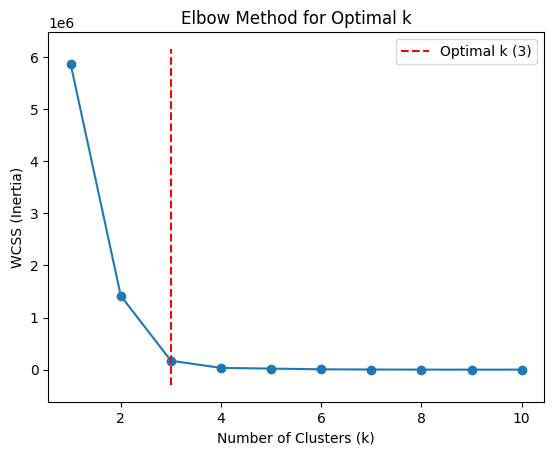

The optimal number of clusters (k) is: 3


In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from kneed import KneeLocator

# Calculate WCSS for a range of cluster numbers
wcss = []
for i in range(1, 11):  # Trying 1 to 10 clusters
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # Inertia is the WCSS

# Plot the elbow curve
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')

# Find the elbow point using KneeLocator
knee = KneeLocator(range(1, 11), wcss, curve="convex", direction="decreasing")
optimal_k = knee.elbow

# Add a vertical line at the optimal k
plt.vlines(optimal_k, plt.ylim()[0], plt.ylim()[1], linestyles='dashed', colors='r', label=f'Optimal k ({optimal_k})') #This line was added

plt.legend() # This line was added to show the legend
plt.show()

print(f"The optimal number of clusters (k) is: {optimal_k}")

In [ ]:
from sklearn.cluster import KMeans
from kneed import KneeLocator  # Install with: !pip install kneed

# Perform k-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
Customercluster_data['Cluster'] = kmeans.fit_predict(X)

In [ ]:
# Analyze the characteristics of each cluster
Customercluster_summary = Customercluster_data.groupby('Cluster')[['AvgReturn', 'TotalCustomers_0_25000', 'TotalCustomers_25001_50000', 'TotalCustomers_50001_75000', 'TotalCustomers_75001_100000', 'TotalCustomers_GreaterThan100000']].mean()
print(Customercluster_summary)

         AvgReturn  TotalCustomers_0_25000  TotalCustomers_25001_50000  \
Cluster                                                                  
0         1.533333              603.000000                 1297.333333   
1         1.742500              280.750000                  565.500000   
2         5.716667               12.666667                   23.333333   

         TotalCustomers_50001_75000  TotalCustomers_75001_100000  \
Cluster                                                            
0                       1203.666667                       562.00   
1                        546.000000                       279.25   
2                         30.333333                        15.00   

         TotalCustomers_GreaterThan100000  
Cluster                                    
0                              349.666667  
1                              157.000000  
2                                3.000000  


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
<ipython-input-21-7e9d0c4c0fc9>:27: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  marker='x', s=100, c=plt.cm.get_cmap()(i / optimal_k),  # Match cluster color
<ipython-input-21-7e9d0c4c0fc9>:26: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(cluster_center[0], cluster_center[1],


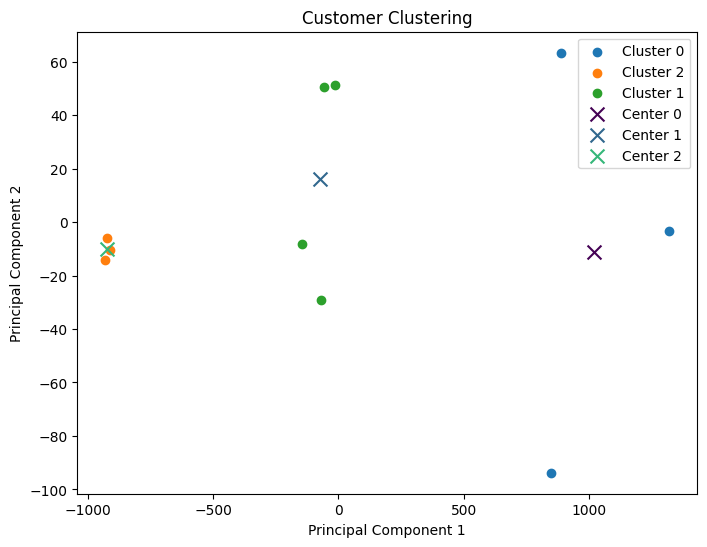

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from kneed import KneeLocator

# Assuming you have your data prepared as described in previous responses
# 'Customercluster_data' contains the features and the 'Cluster' column

# 1. Perform PCA for dimensionality reduction
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
X_pca = pca.fit_transform(X)

# 2. Get cluster centers in PCA space
cluster_centers_pca = pca.transform(kmeans.cluster_centers_)

# 3. Create the scatter plot
plt.figure(figsize=(8, 6))
for cluster in Customercluster_data['Cluster'].unique():
    plt.scatter(X_pca[Customercluster_data['Cluster'] == cluster, 0],
                X_pca[Customercluster_data['Cluster'] == cluster, 1],
                label=f'Cluster {cluster}')

# 4. Plot cluster centers with matching colors
for i, cluster_center in enumerate(cluster_centers_pca):
    plt.scatter(cluster_center[0], cluster_center[1],
                marker='x', s=100, c=plt.cm.get_cmap()(i / optimal_k),  # Match cluster color
                label=f'Center {i}')

plt.title('Customer Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [ ]:
# Display the table with TerritoryID, Cluster, and data
print(Customercluster_data[['TerritoryID', 'Cluster', 'AvgReturn', 'TotalCustomers_0_25000', 'TotalCustomers_25001_50000', 'TotalCustomers_50001_75000', 'TotalCustomers_75001_100000', 'TotalCustomers_GreaterThan100000']])

   TerritoryID  Cluster  AvgReturn  TotalCustomers_0_25000  \
0            1        0       1.34                     575   
1            2        2       6.18                      13   
2            3        2       5.65                      13   
3            4        0       1.37                     670   
4            5        2       5.32                      12   
5            6        1       2.43                     275   
6            7        1       1.44                     246   
7            8        1       1.45                     314   
8            9        0       1.89                     564   
9           10        1       1.65                     288   

   TotalCustomers_25001_50000  TotalCustomers_50001_75000  \
0                        1187                        1118   
1                          20                          24   
2                          17                          31   
3                        1492                        1394   
4           

In [ ]:
import pandas as pd

# Merge the dataframes
cluster_data =TerritoryGrowth_df[['TerritoryID', 'AvgGrowthPercentage']]
cluster_data = pd.merge(cluster_data, CustomerTerritoryDimension_df[['TerritoryID', 'SalesYTD', 'SalesLastYear']], on='TerritoryID')

# Handle missing values (if any) - replace with 0 for now
cluster_data.fillna(0, inplace=True)
cluster_data = cluster_data.groupby('TerritoryID').first().reset_index()

# Select the features for clustering
X = cluster_data[['AvgGrowthPercentage', 'SalesYTD', 'SalesLastYear']]

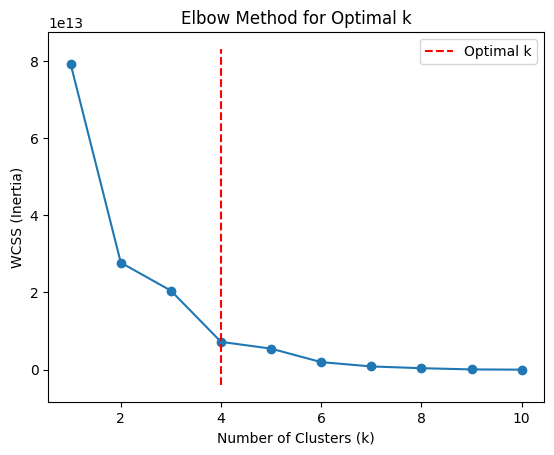

The optimal number of clusters (k) is: 4


In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from kneed import KneeLocator

# Calculate WCSS for a range of cluster numbers
wcss = []
for i in range(1, 11):  # Trying 1 to 10 clusters
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # Inertia is the WCSS

# Plot the elbow curve
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')

# Find the elbow point using KneeLocator
knee = KneeLocator(range(1, 11), wcss, curve="convex", direction="decreasing")
optimal_k = knee.elbow

# Add a vertical line at the optimal k value
plt.vlines(optimal_k, plt.ylim()[0], plt.ylim()[1], linestyles='dashed', colors='r', label='Optimal k')

plt.legend()
plt.show()

print(f"The optimal number of clusters (k) is: {optimal_k}")
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_data['Cluster'] = kmeans.fit_predict(X)

In [ ]:
# Analyze the characteristics of each cluster
cluster_summary = cluster_data.groupby('Cluster')[['AvgGrowthPercentage', 'SalesYTD', 'SalesLastYear']].mean()
print(cluster_summary)

         AvgGrowthPercentage      SalesYTD  SalesLastYear
Cluster                                                  
0                  19.710000  1.051085e+07   5.366576e+06
1                 105.200000  4.892080e+06   1.904715e+06
2                  14.245000  7.329508e+06   4.496342e+06
3                  10.273333  2.671006e+06   3.579078e+06


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


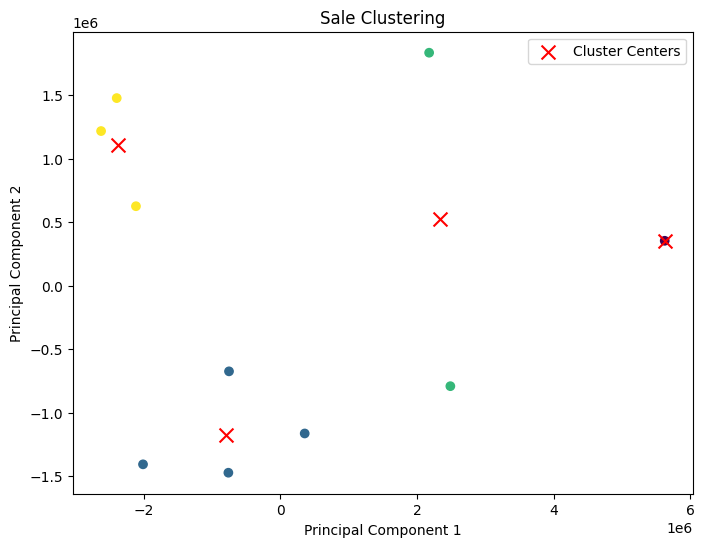

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from kneed import KneeLocator

# Assuming you have your data prepared, clustered, and stored in 'cluster_data' (as in the previous responses)

# 1. Perform PCA for dimensionality reduction
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
X_pca = pca.fit_transform(X)

# 2. Get cluster centers in PCA space
cluster_centers_pca = pca.transform(kmeans.cluster_centers_)

# 3. Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_data['Cluster'], cmap='viridis')  # Color by cluster

# 4. Plot cluster centers
plt.scatter(cluster_centers_pca[:, 0], cluster_centers_pca[:, 1], marker='x', s=100, c='red', label='Cluster Centers')

plt.title('Sale Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [ ]:
# Display the table with TerritoryID, Cluster, and data
print(cluster_data[['TerritoryID', 'Cluster', 'AvgGrowthPercentage', 'SalesYTD', 'SalesLastYear']])

   TerritoryID  Cluster  AvgGrowthPercentage      SalesYTD  SalesLastYear
0            1        2                10.01  7.887187e+06   3.298694e+06
1            2        3                38.33  2.402177e+06   3.607149e+06
2            3        3                 9.47  3.072175e+06   3.205014e+06
3            4        0                19.71  1.051085e+07   5.366576e+06
4            5        3               -16.98  2.538667e+06   3.925071e+06
5            6        2                18.48  6.771829e+06   5.693989e+06
6            7        1               152.25  4.772398e+06   2.396540e+06
7            8        1               140.06  3.805202e+06   1.307950e+06
8            9        1                31.52  5.977815e+06   2.278549e+06
9           10        1                96.97  5.012905e+06   1.635823e+06
